### Atividade 03

1)Apresentar o Histograma das imagens selecionadas em aulas anteriores

2)Clarear e escurecer as imagens (usando dois valores de gamma), apresentando também o histograma

3)Binarizar as imagens originais e transformadas no item anterior (Otsu e manual)

4)Apresentar as imagens originais com os bits mais e menos significativos


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


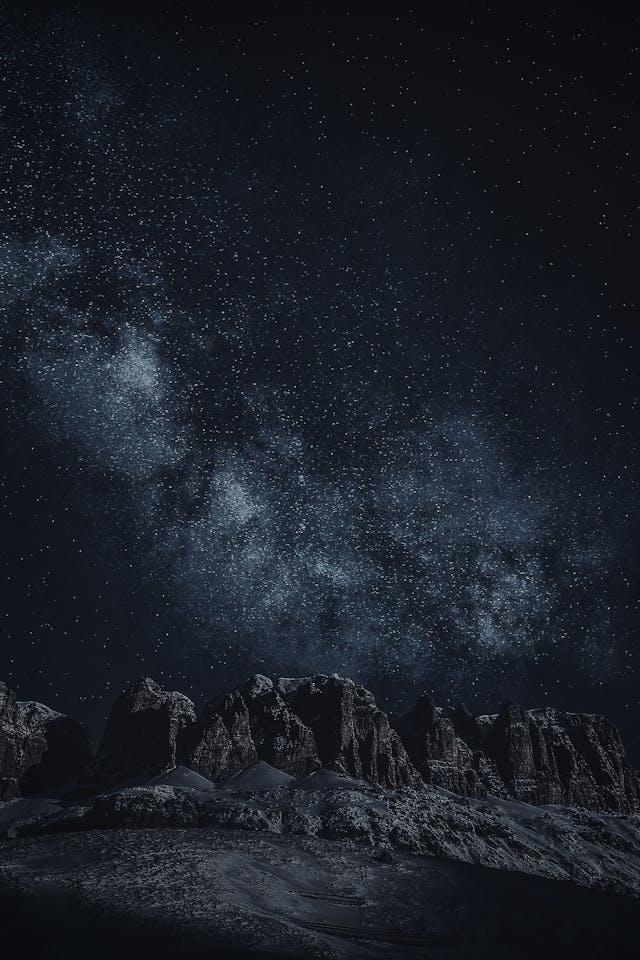

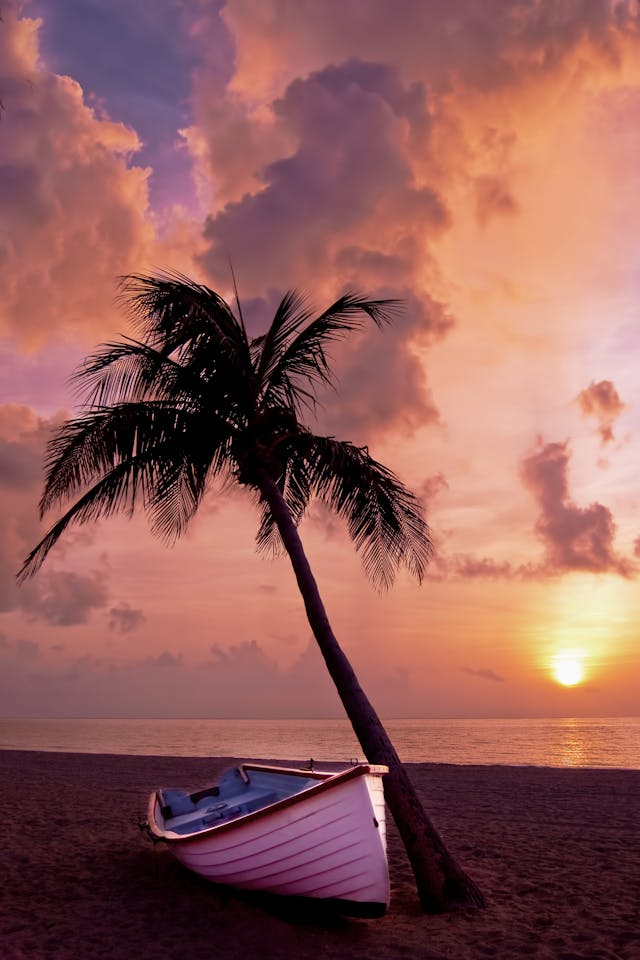

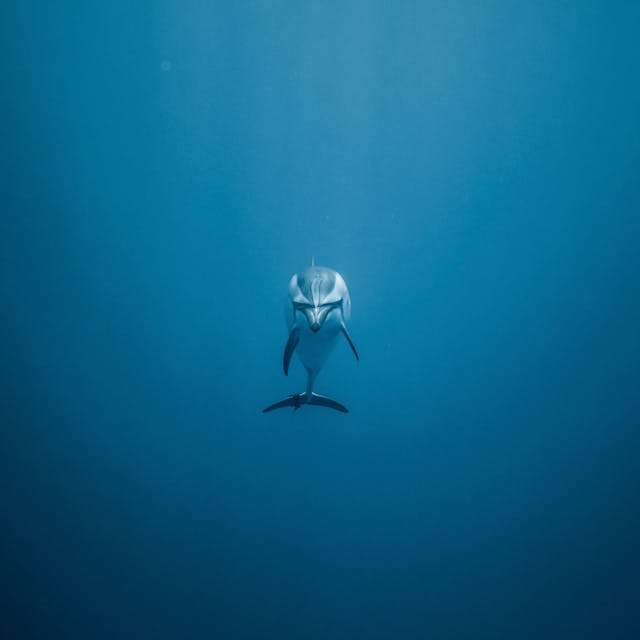

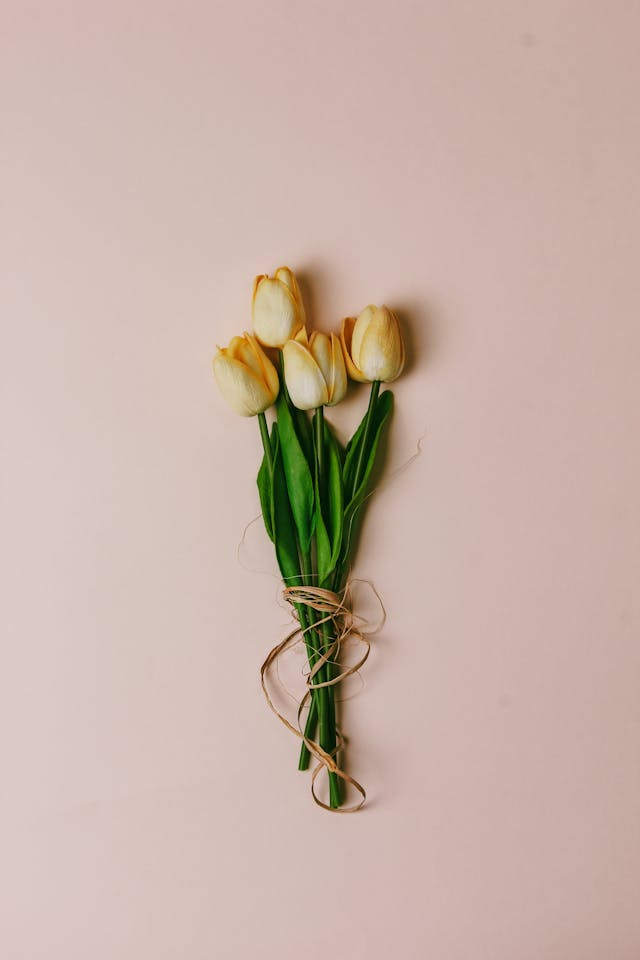

In [2]:
import cv2
from google.colab.patches import cv2_imshow

# Lista de caminhos para as quatro imagens
imagens = ['/content/drive/MyDrive/PIM/ATVD02/small1.jpg',  '/content/drive/MyDrive/PIM/ATVD02/small2.jpg',  '/content/drive/MyDrive/PIM/ATVD02/small3.jpg', '/content/drive/MyDrive/PIM/ATVD02/small4.jpg']

for path in imagens:
    # Carregue a imagem
    imagem = cv2.imread(path)

    # Verifique se a imagem foi carregada corretamente
    if imagem is not None:
        cv2_imshow(imagem)
    else:
        print(f'Erro ao carregar a imagem {path}.')

In [3]:
img1a =  "/content/drive/MyDrive/PIM/ATVD02/small1.jpg"


img2a = "/content/drive/MyDrive/PIM/ATVD02/small2.jpg"


img3a = "/content/drive/MyDrive/PIM/ATVD02/small3.jpg"


img4a = "/content/drive/MyDrive/PIM/ATVD02/small4.jpg"



def Inf_spatial(img_grayscale):
    sh = cv2.Sobel (img_grayscale, cv2.CV_64F , 1, 0, ksize =1)
    sv = cv2.Sobel (img_grayscale , cv2.CV_64F , 0, 1, ksize =1)

    #SIr = np.sqrt (sh **2 + sv **2)
    SIr = np.sqrt(np.square(sh) + np.square(sv))

    SI_mean = np.sum(SIr ) / (SIr. shape [0] * SIr . shape [1])
    SI_rms = np.sqrt (np.sum (SIr **2) / (SIr. shape [0] * SIr . shape [1]) )
    SI_stdev = np.sqrt (np.sum(SIr **2 - SI_mean **2) / (SIr. shape [0] *SIr. shape [1]) )

    return SI_stdev

imag_1a = cv2.imread(img1a)

imag_2a = cv2.imread(img2a)

imag_3a = cv2.imread(img3a)

imag_4a = cv2.imread(img4a)



imgGrey1 = cv2.cvtColor(imag_1a,cv2.COLOR_BGR2GRAY)
imgGrey2 = cv2.cvtColor(imag_2a,cv2.COLOR_BGR2GRAY)
imgGrey3 = cv2.cvtColor(imag_3a,cv2.COLOR_BGR2GRAY)
imgGrey4 = cv2.cvtColor(imag_4a,cv2.COLOR_BGR2GRAY)


SI = Inf_spatial(imgGrey1)
SI2 = Inf_spatial(imgGrey2)
SI3 = Inf_spatial(imgGrey3)
SI4 = Inf_spatial(imgGrey4)


print ("Informação espacial 1 : %f" % SI )
print ("Informação espacial 2 : %f" % SI2 )
print ("Informação espacial 3 : %f" % SI3 )
print ("Informação espacial 4 : %f" % SI4 )

Informação espacial 1 : 23.851242
Informação espacial 2 : 21.818437
Informação espacial 3 : 3.758798
Informação espacial 4 : 11.215503


### 1) Histograma

função histogram da biblioteca numpy, em que é calculado o histograma da imagem:
- imagem.flatten() transforma a matriz de pixels em uma única dimensão, tornando mais fácil calcular o histograma.
-  bins=256 especifica o número de intervalos (ou "bins") no histograma, que corresponde ao número de tons de cinza possíveis (de 0 a 255).
- range=(0,256) define a faixa de valores dos pixels.

O resultado é atribuído a histogram, enquanto *_* é usado para descartar os intervalos calculados.

[Disponível aqui](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)

In [4]:
def histograma(imagem):
    histogram, _ = np.histogram(imagem.flatten(), bins=256, range=(0,256))
    return histogram

#### Imagem 1

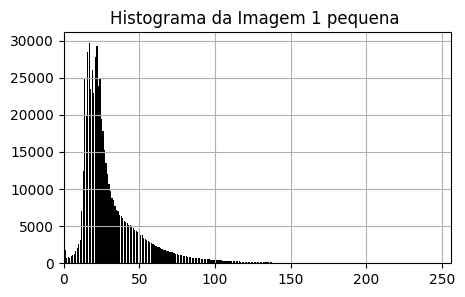

In [5]:
hist_1 = histograma(imgGrey1)
plt.figure(figsize=(5, 3))
plt.title("Histograma da Imagem 1 pequena ")
plt.bar(np.arange(256), hist_1, color='black')
plt.xlim([0, 256])
plt.grid(True)


#### Imagem 2

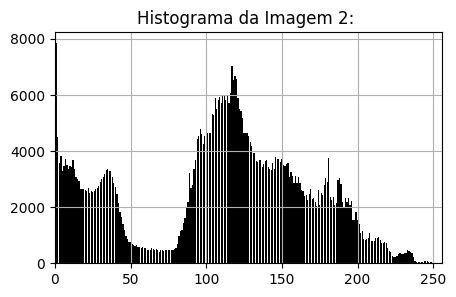

In [6]:
hist_2 = histograma(imgGrey2)
plt.figure(figsize=(5, 3))
plt.title("Histograma da Imagem 2: ")
plt.bar(np.arange(256), hist_2, color='black')
plt.xlim([0, 256])
plt.grid(True)

#### Imagem 3

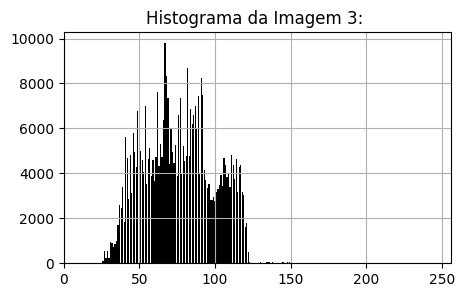

In [7]:
hist_3 = histograma(imgGrey3)
plt.figure(figsize=(5, 3))
plt.title("Histograma da Imagem 3: ")
plt.bar(np.arange(256), hist_3, color='black')
plt.xlim([0, 256])
plt.grid(True)

#### Imagem 4

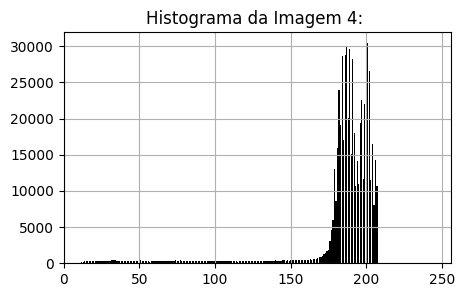

In [8]:
hist_4 = histograma(imgGrey4)
plt.figure(figsize=(5, 3))
plt.title("Histograma da Imagem 4: ")
plt.bar(np.arange(256), hist_4, color='black')
plt.xlim([0, 256])
plt.grid(True)

### 2) Clarear e escurecer Imagens

In [9]:
def cl_es(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

In [10]:
gamma_cl = 2
gamma_es = 0.5

#### Imagem 1

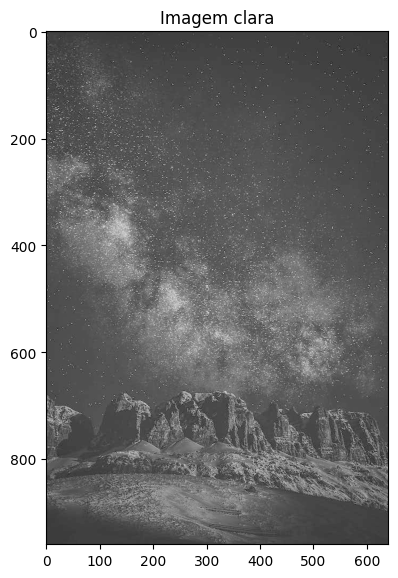

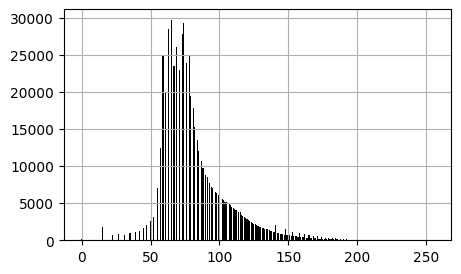

In [49]:
img_cl_1 = cl_es(imgGrey1,gamma_cl)
plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(img_cl_1, cmap='gray')
plt.title('Imagem clara')
# Histograma
hist_cl_1= histograma(img_cl_1)
plt.figure(figsize=(5, 3))
plt.bar(np.arange(256), hist_cl_1, color='black')
plt.grid(True)

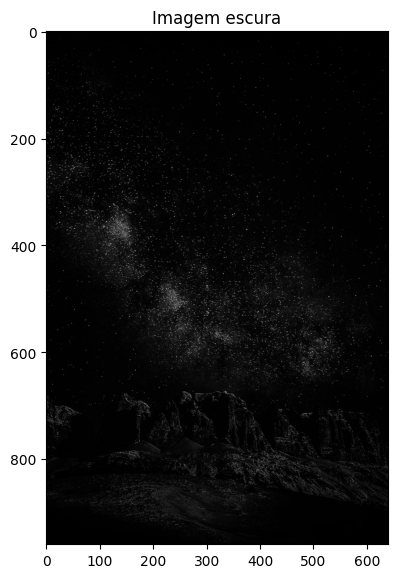

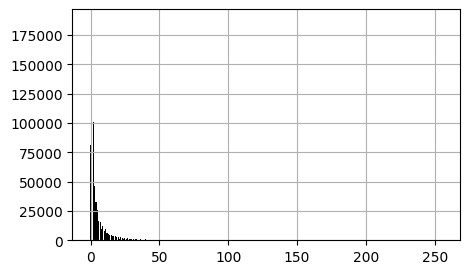

In [50]:
img_es_1 = cl_es(imgGrey1,gamma_es)
plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(img_es_1, cmap='gray')
plt.title('Imagem escura')

hist_es_1= histograma(img_es_1)
plt.figure(figsize=(5, 3))
plt.bar(np.arange(256), hist_es_1, color='black')
plt.grid(True)

#### Imagem 2

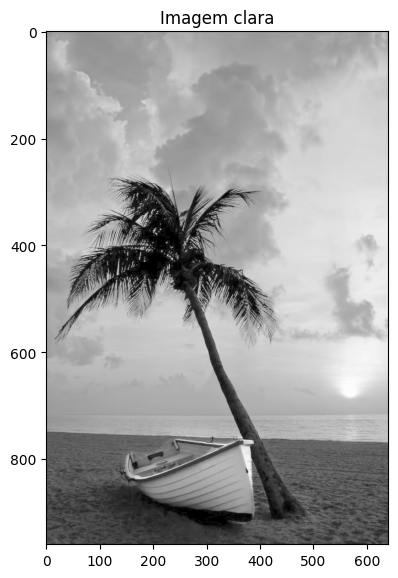

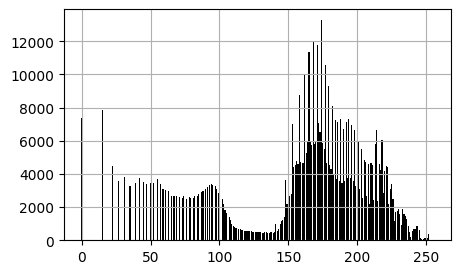

In [51]:
img_cl_2 = cl_es(imgGrey2,gamma_cl)
plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(img_cl_2, cmap='gray')
plt.title('Imagem clara')

hist_cl_2= histograma(img_cl_2)
plt.figure(figsize=(5, 3))
plt.bar(np.arange(256), hist_cl_2,color='black')
plt.grid(True)

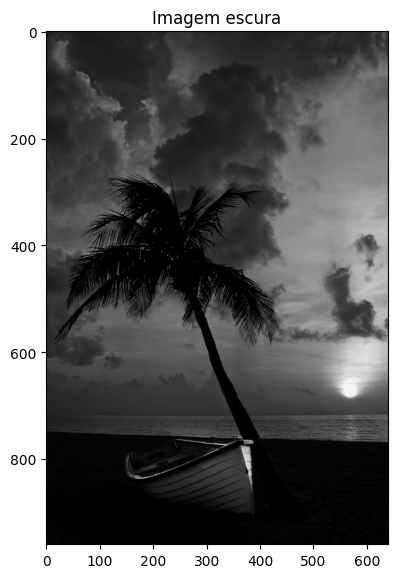

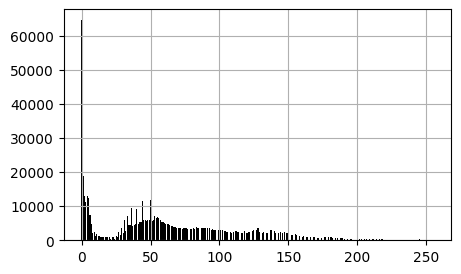

In [52]:
img_es_2 = cl_es(imgGrey2,gamma_es)
plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(img_es_2, cmap='gray')
plt.title('Imagem escura')

hist_es_2= histograma(img_es_2)
plt.figure(figsize=(5, 3))
plt.bar(np.arange(256), hist_es_2, color='black')
plt.grid(True)

#### Imagem 3

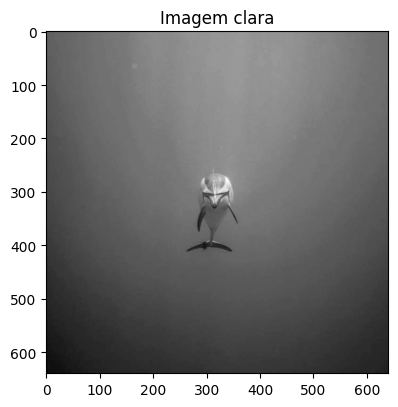

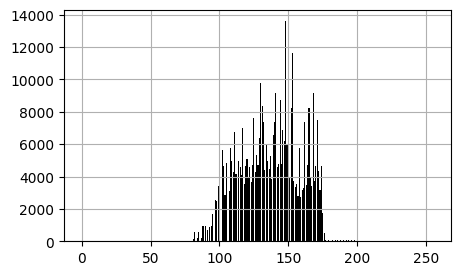

In [53]:
img_cl_3 = cl_es(imgGrey3,gamma_cl)
plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(img_cl_3, cmap='gray')
plt.title('Imagem clara')

hist_cl_3= histograma(img_cl_3)
plt.figure(figsize=(5, 3))
plt.bar(np.arange(256), hist_cl_3,color='black')
plt.grid(True)

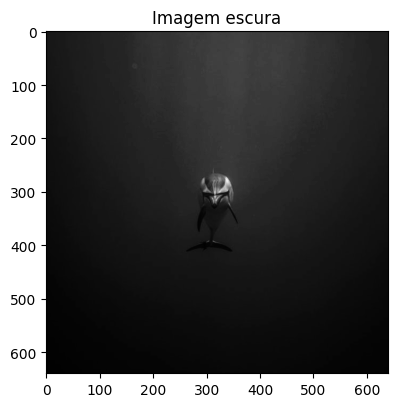

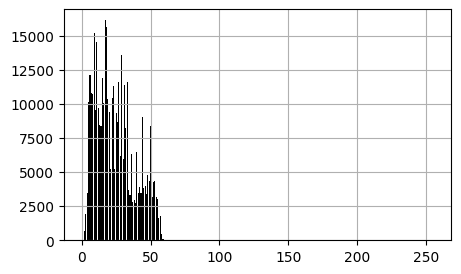

In [54]:
img_es_3 = cl_es(imgGrey3,gamma_es)
plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(img_es_3, cmap='gray')
plt.title('Imagem escura')

hist_es_3= histograma(img_es_3)
plt.figure(figsize=(5, 3))
plt.bar(np.arange(256), hist_es_3, color='black')
plt.grid(True)

#### Imagem 4

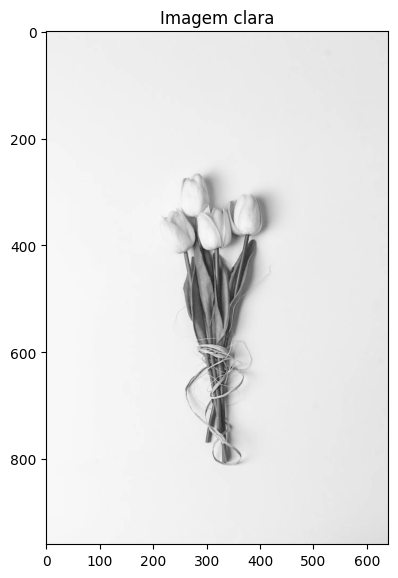

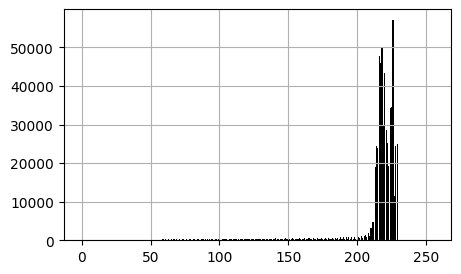

In [55]:
img_cl_4 = cl_es(imgGrey4,gamma_cl)
plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(img_cl_4, cmap='gray')
plt.title('Imagem clara')

hist_cl_4= histograma(img_cl_4)
plt.figure(figsize=(5, 3))
plt.bar(np.arange(256), hist_cl_4,color='black')
plt.grid(True)

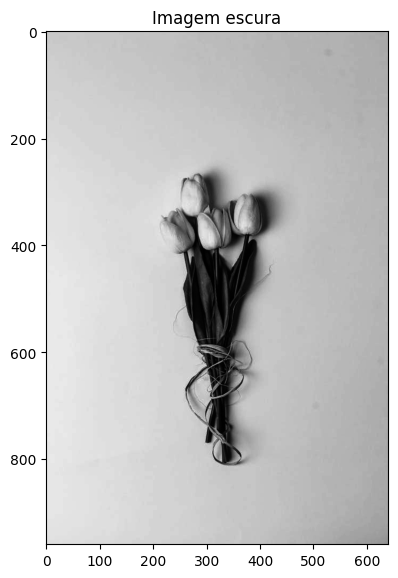

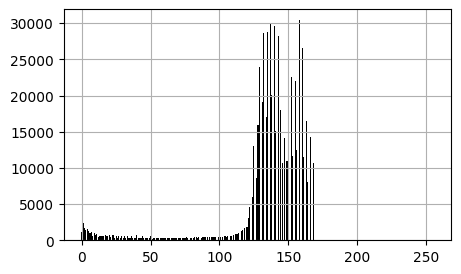

In [56]:
img_es_4= cl_es(imgGrey4,gamma_es)
plt.figure(figsize=(15, 9))
plt.subplot(1, 3, 1)
plt.imshow(img_es_4, cmap='gray')
plt.title('Imagem escura')

hist_es_4= histograma(img_es_4)
plt.figure(figsize=(5, 3))
plt.bar(np.arange(256), hist_es_4, color='black')
plt.grid(True)

### 3) Binarizar as imagens originais e transformadas no item anterior





Otsu

In [15]:
def bin_otsu(imagem):
    # Aplica limiarização de Otsu
    _, imagem_binarizada = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return imagem_binarizada

Manual

In [73]:
def bin_manual(imagem):
    conf_manual= 120
    limiar, imagem_binarizada = cv2.threshold(imagem, conf_manual, 255, cv2.THRESH_BINARY)
    return limiar,imagem_binarizada


#### Imagem 1 (OTSU)

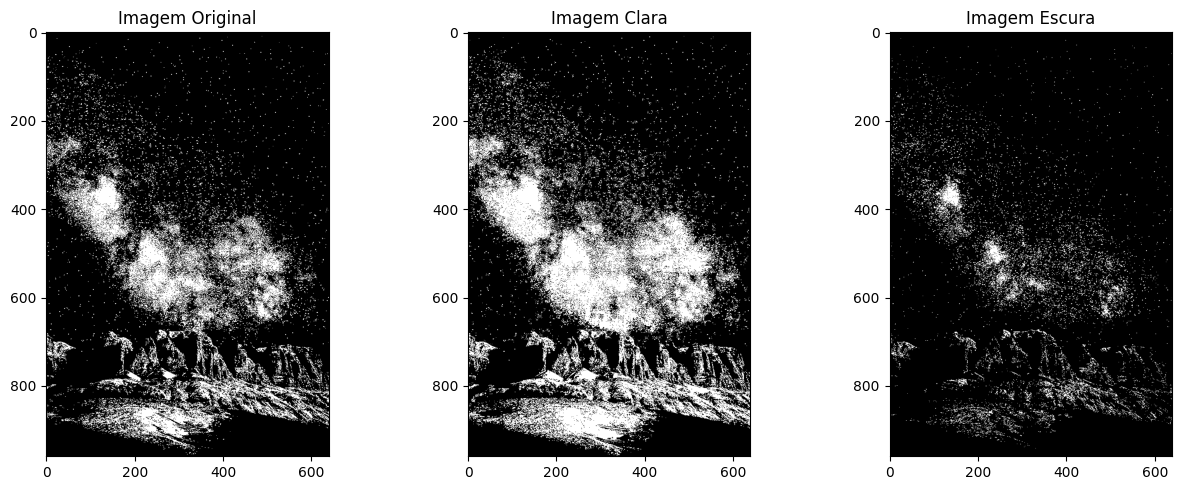

In [59]:
imagem_original1_binarizada_otsu = bin_otsu(imgGrey1)
imagem_transformada_binarizada_clara1_otsu = bin_otsu(img_cl_1)
imagem_transformada_binarizada_escura1_otsu = bin_otsu(img_es_1)

# Plotar imagens lado a lado
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagem_original1_binarizada_otsu, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(imagem_transformada_binarizada_clara1_otsu ,cmap='gray')
plt.title('Imagem Clara')

plt.subplot(1, 3, 3)
plt.imshow(imagem_transformada_binarizada_escura1_otsu , cmap='gray')
plt.title('Imagem Escura')

plt.tight_layout()
plt.show()

#### Imagem 1 (MANUAL)

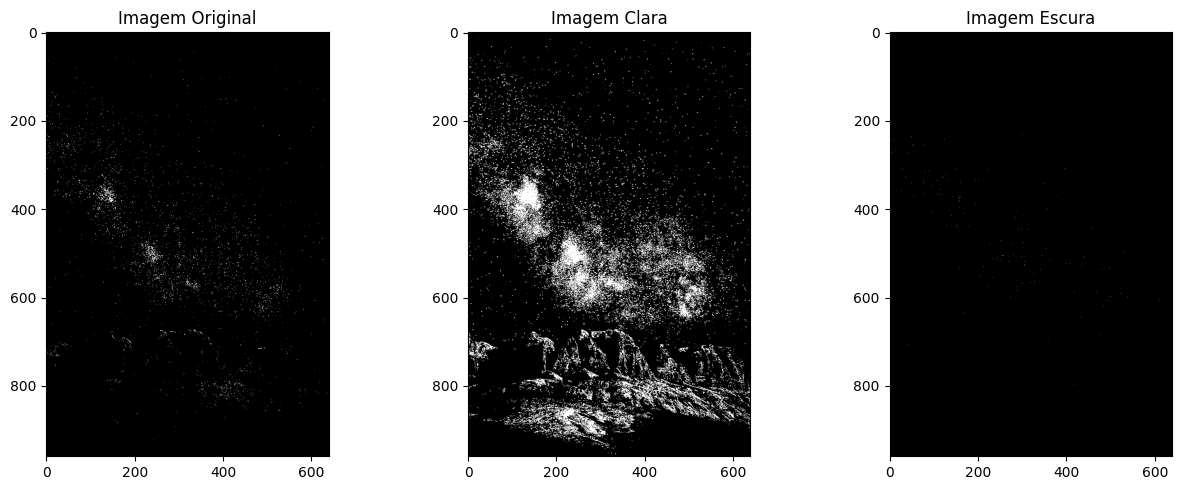

In [74]:
l1_1, manual_1  = bin_manual(imgGrey1)
l1, manual_cl_1  = bin_manual(img_cl_1)
l1, manual_es_1  = bin_manual(img_es_1)

# Plotar as imagens
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.imshow(manual_1 , cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(manual_cl_1,cmap='gray')
plt.title('Imagem Clara')

plt.subplot(1, 3, 3)
plt.imshow(manual_es_1 , cmap='gray')
plt.title('Imagem Escura')

plt.tight_layout()
plt.show()


#### Imagem 2 (OTSU)

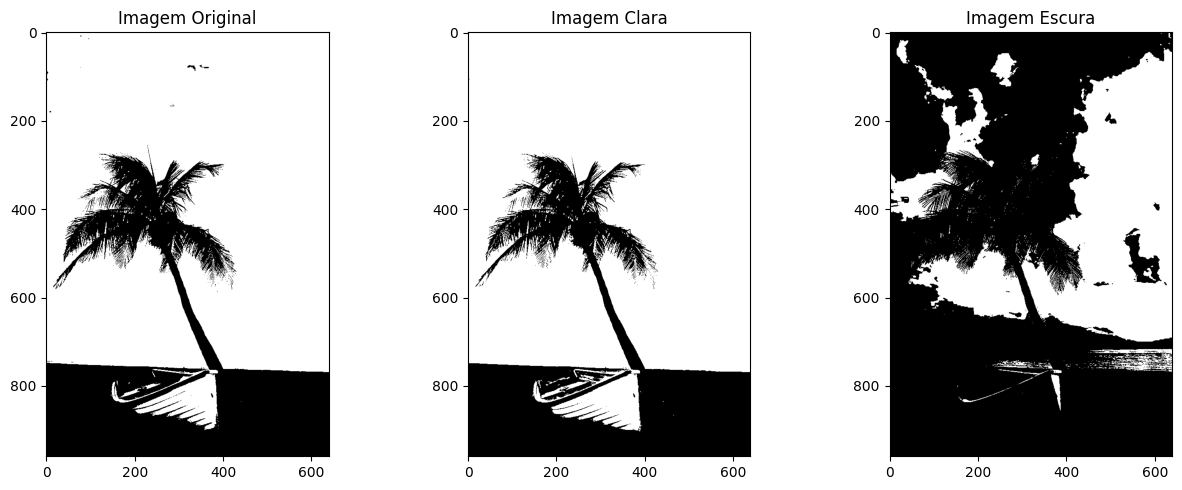

In [60]:
imagem_original2_binarizada_otsu = bin_otsu(imgGrey2)
imagem_transformada_binarizada_clara2_otsu = bin_otsu(img_cl_2)
imagem_transformada_binarizada_escura2_otsu = bin_otsu(img_es_2)

# Plotar imagens lado a lado
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagem_original2_binarizada_otsu, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(imagem_transformada_binarizada_clara2_otsu ,cmap='gray')
plt.title('Imagem Clara')

plt.subplot(1, 3, 3)
plt.imshow(imagem_transformada_binarizada_escura2_otsu , cmap='gray')
plt.title('Imagem Escura')

plt.tight_layout()
plt.show()

#### Imagem 2 (MANUAL)

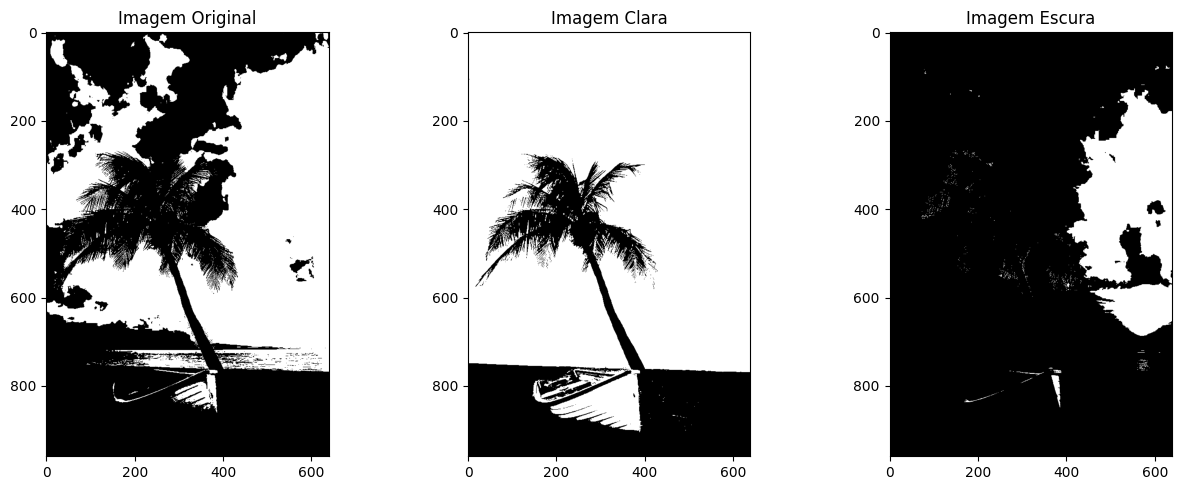

In [65]:
l1_2, manual_2  = bin_manual(imgGrey2)
l1, manual_cl_2  = bin_manual(img_cl_2)
l1, manual_es_2  = bin_manual(img_es_2)


plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.imshow(manual_2 , cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(manual_cl_2,cmap='gray')
plt.title('Imagem Clara')

plt.subplot(1, 3, 3)
plt.imshow(manual_es_2 , cmap='gray')
plt.title('Imagem Escura')

plt.tight_layout()
plt.show()


#### Imagem 3 (OTSU)

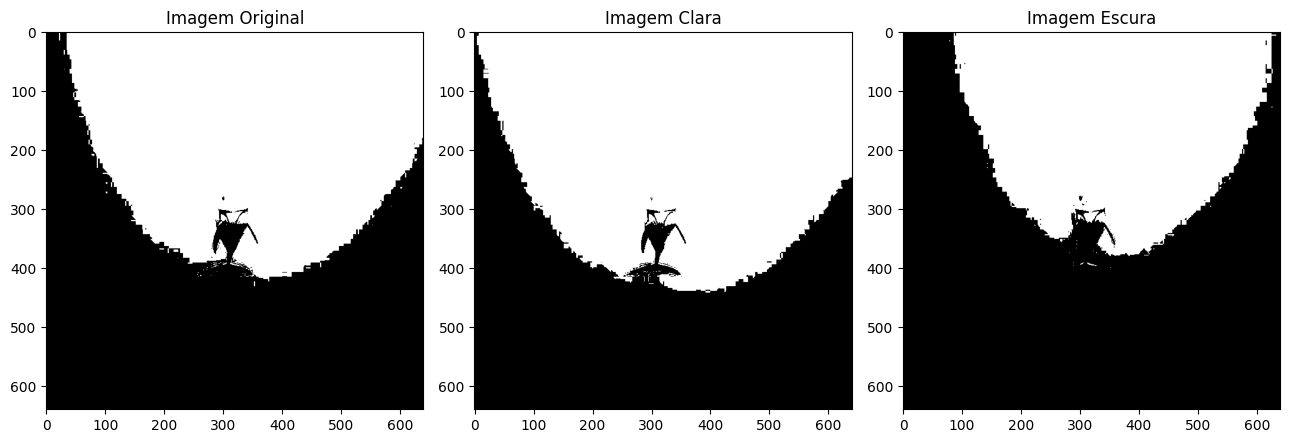

In [22]:
imagem_original3_binarizada_otsu = bin_otsu(imgGrey3)
imagem_transformada_binarizada_clara3_otsu = bin_otsu(img_cl_3)
imagem_transformada_binarizada_escura3_otsu = bin_otsu(img_es_3)

# Plotar imagens lado a lado
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagem_original3_binarizada_otsu, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(imagem_transformada_binarizada_clara3_otsu ,cmap='gray')
plt.title('Imagem Clara')

plt.subplot(1, 3, 3)
plt.imshow(imagem_transformada_binarizada_escura3_otsu , cmap='gray')
plt.title('Imagem Escura')

plt.tight_layout()
plt.show()

#### Imagem 3 (MANUAL)

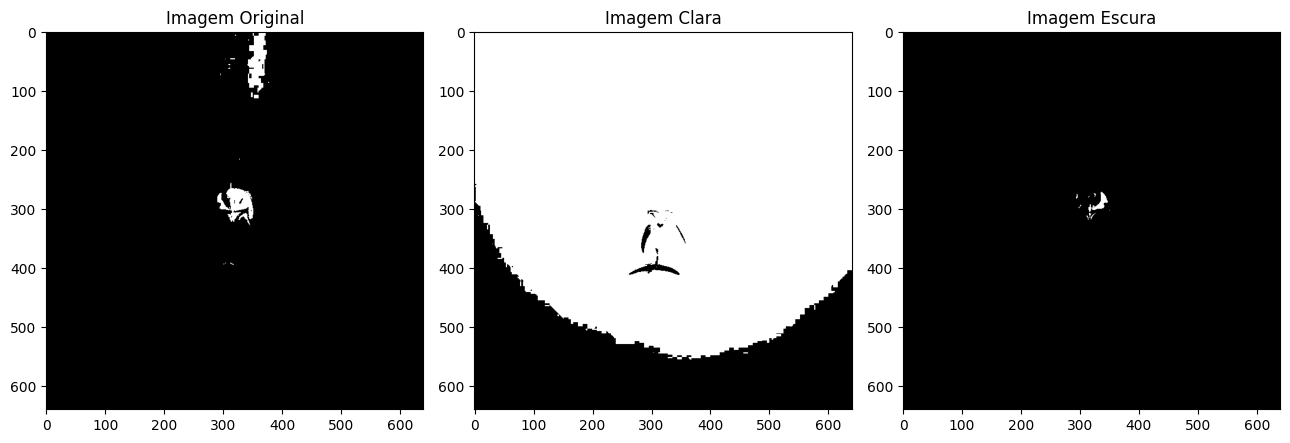

In [67]:
l1_3, manual_3  = bin_manual(imgGrey3)
l1, manual_cl_3  = bin_manual(img_cl_3)
l1, manual_es_3  = bin_manual(img_es_3)


plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.imshow(manual_3 , cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(manual_cl_3,cmap='gray')
plt.title('Imagem Clara')

plt.subplot(1, 3, 3)
plt.imshow(manual_es_3 , cmap='gray')
plt.title('Imagem Escura')

plt.tight_layout()
plt.show()

#### Imagem 4 (OTSU)

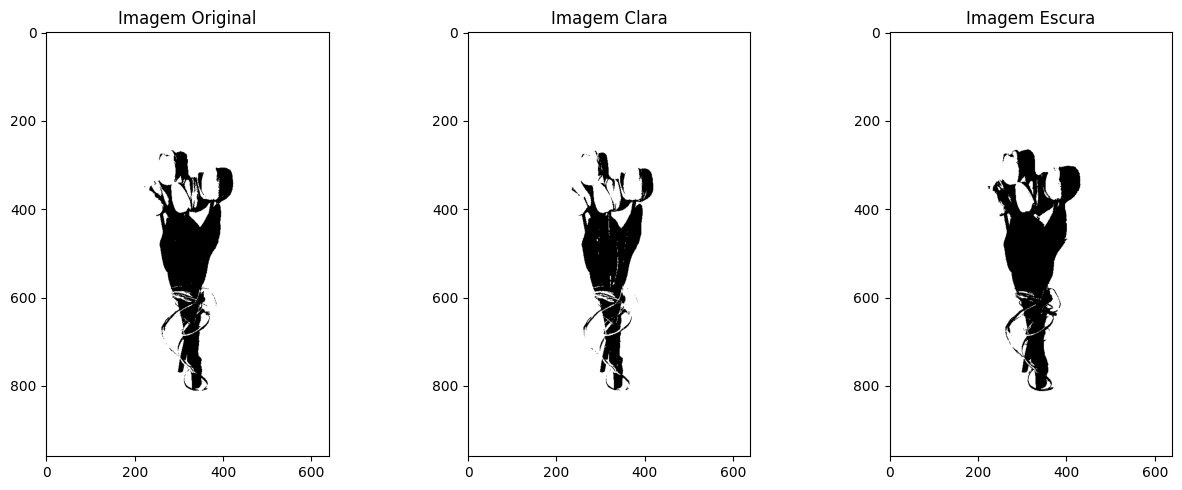

In [ ]:
imagem_original4_binarizada_otsu = bin_otsu(imgGrey4)
imagem_transformada_binarizada_clara4_otsu = bin_otsu(img_cl_4)
imagem_transformada_binarizada_escura4_otsu = bin_otsu(img_es_4)

# Plotar imagens lado a lado
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagem_original4_binarizada_otsu, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(imagem_transformada_binarizada_clara4_otsu ,cmap='gray')
plt.title('Imagem Clara')

plt.subplot(1, 3, 3)
plt.imshow(imagem_transformada_binarizada_escura4_otsu , cmap='gray')
plt.title('Imagem Escura')

plt.tight_layout()
plt.show()

#### Imagem 4 (MANUAL)

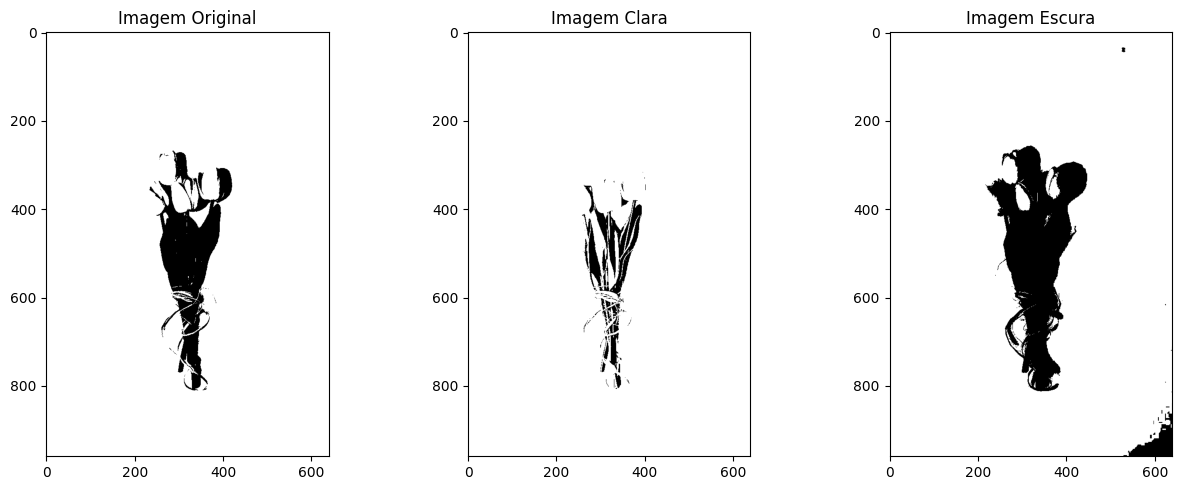

In [68]:
l1_4, manual_4  = bin_manual(imgGrey4)
l1, manual_cl_4  = bin_manual(img_cl_4)
l1, manual_es_4  = bin_manual(img_es_4)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.imshow(manual_4 , cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(manual_cl_4,cmap='gray')
plt.title('Imagem Clara')

plt.subplot(1, 3, 3)
plt.imshow(manual_es_4 , cmap='gray')
plt.title('Imagem Escura')

plt.tight_layout()
plt.show()

### 4) Imagens originais com os bits mais (MSB) e menos significativos (LSB)

#### Imagem 1

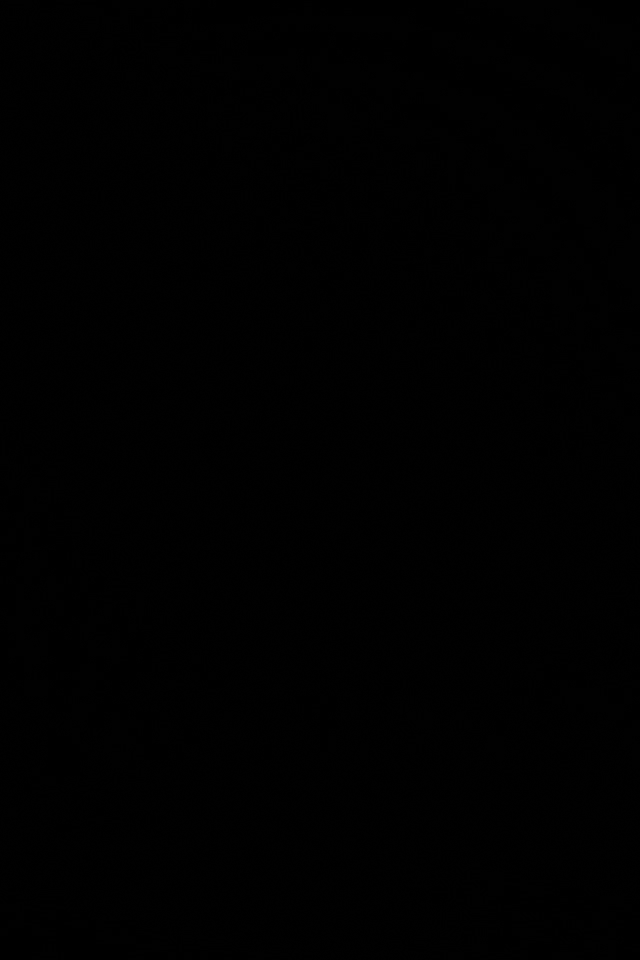

Bit 0 (LSB)


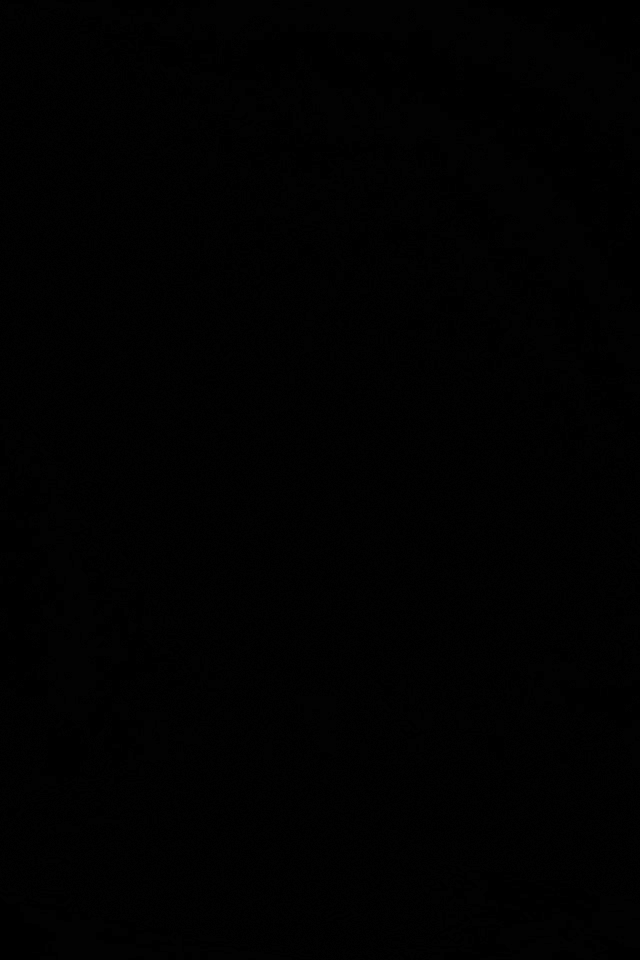

Bit 1 (LSB)


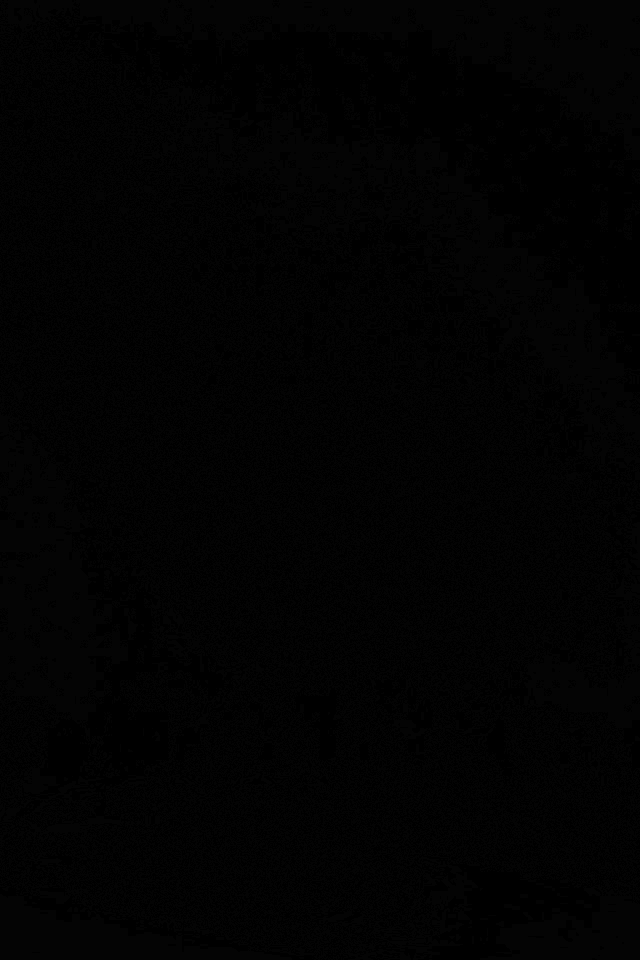

Bit 2 (LSB)


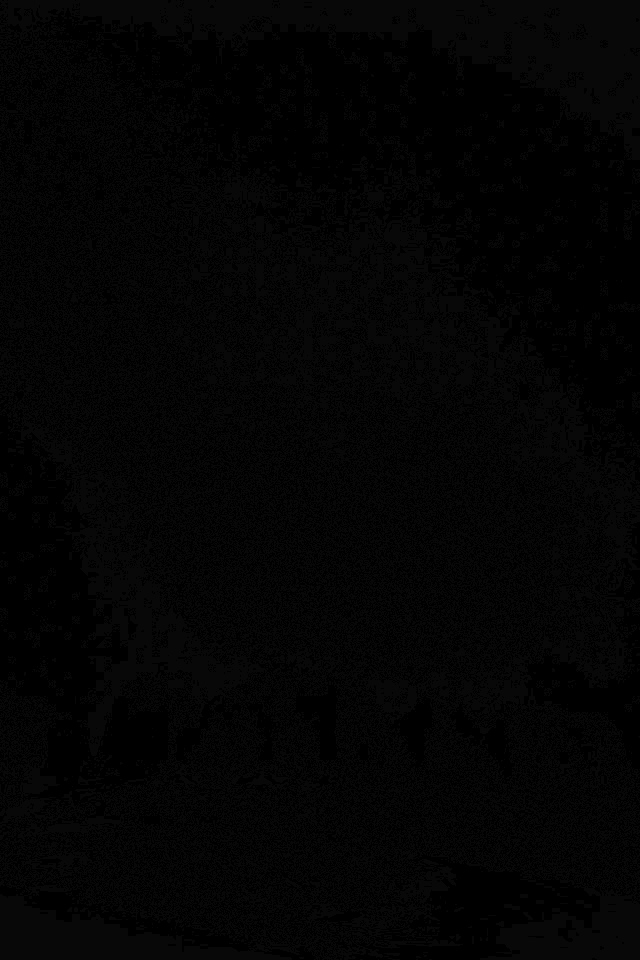

Bit 3 (LSB)


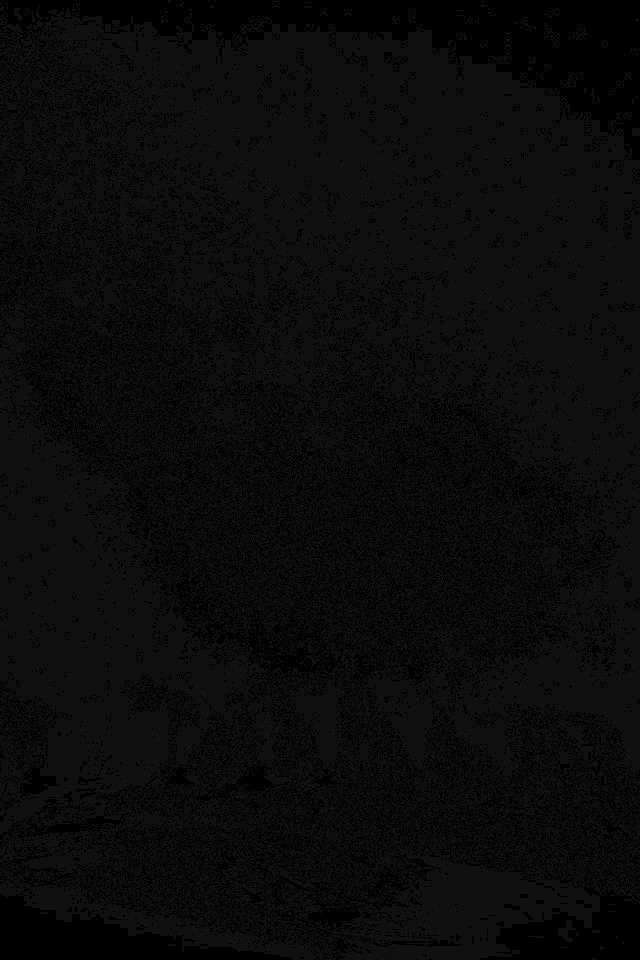

Bit 4 (LSB)


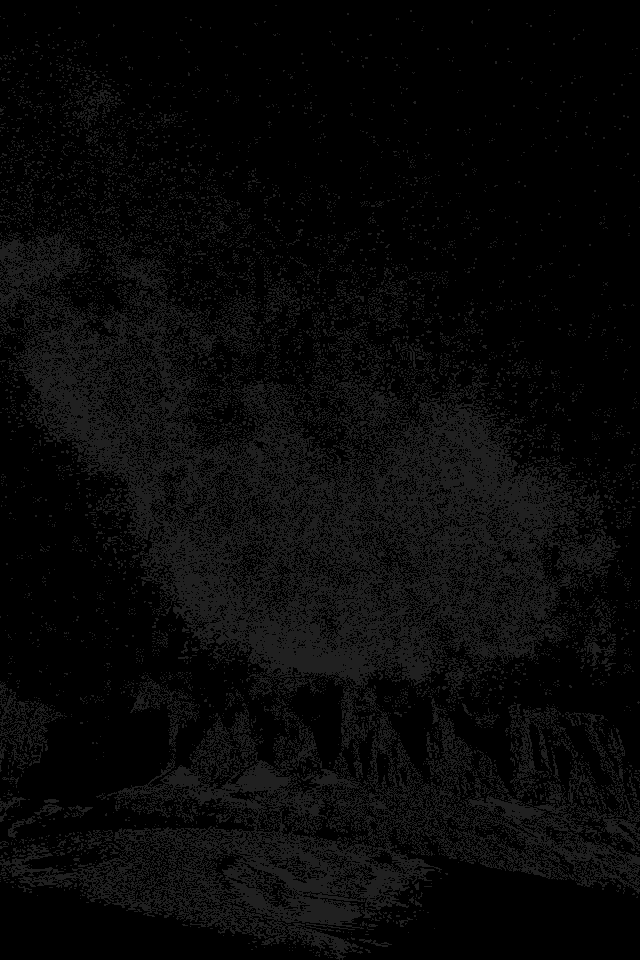

Bit 5 (LSB)


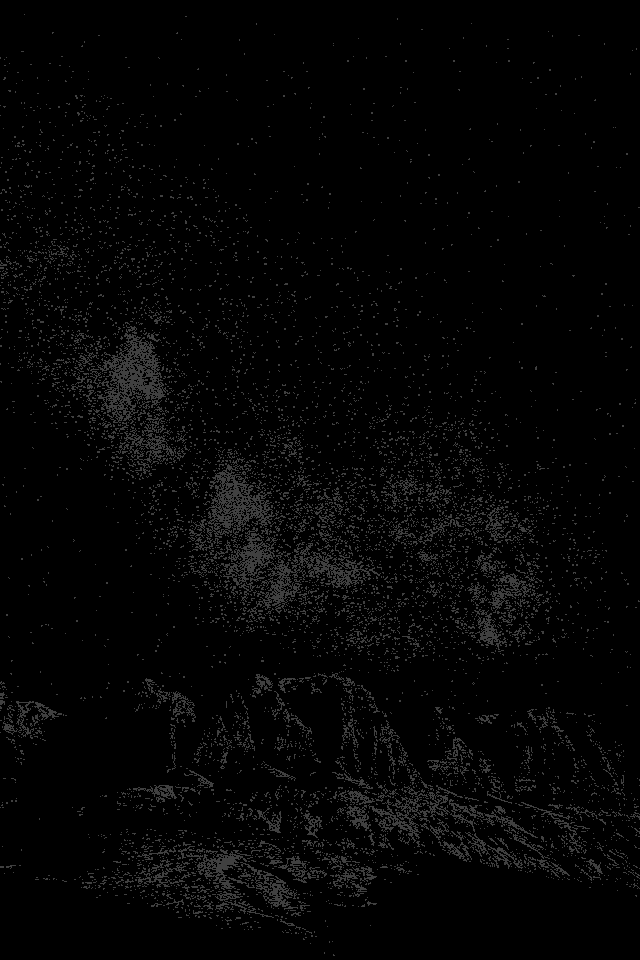

Bit 6 (LSB)


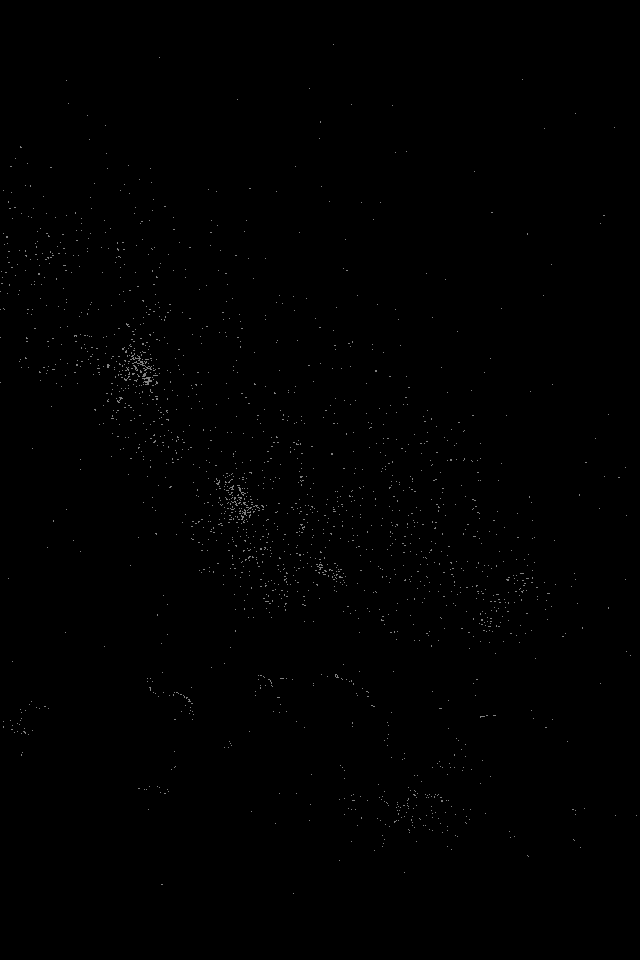

Bit 7 (MSB)


In [45]:
for i in range(8):

    img_1_bits = imgGrey1 & (1 << i)     # Extraindo o bit i da imagem original
    bit_type = "MSB" if i == 7 else "LSB"    # Identificando se é MSB ou LSB
    cv2_imshow(img_1_bits)
    print(f'Bit {i} ({bit_type})')


#### Imagem  2

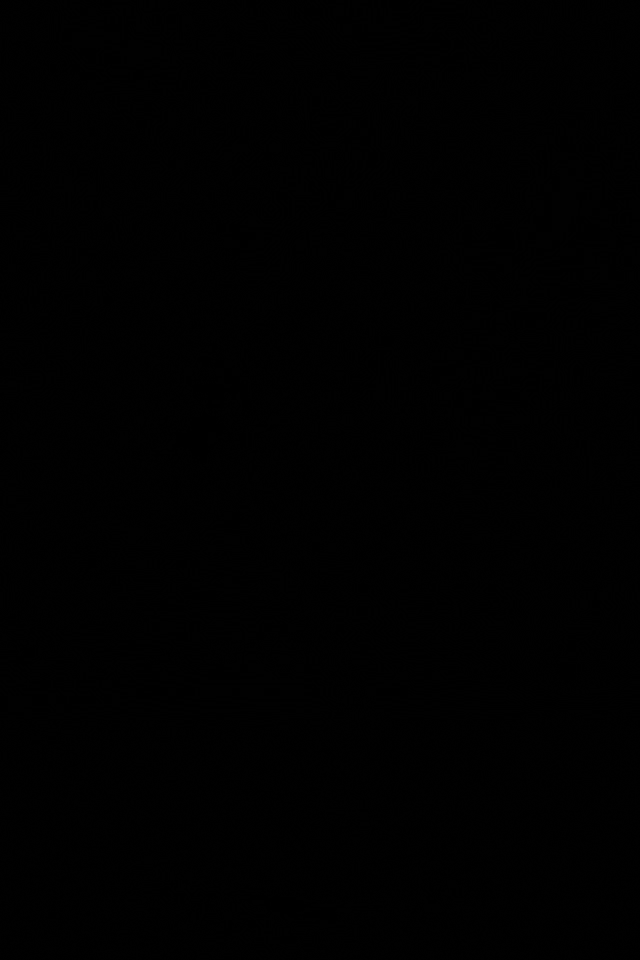

Bit 0 (LSB)


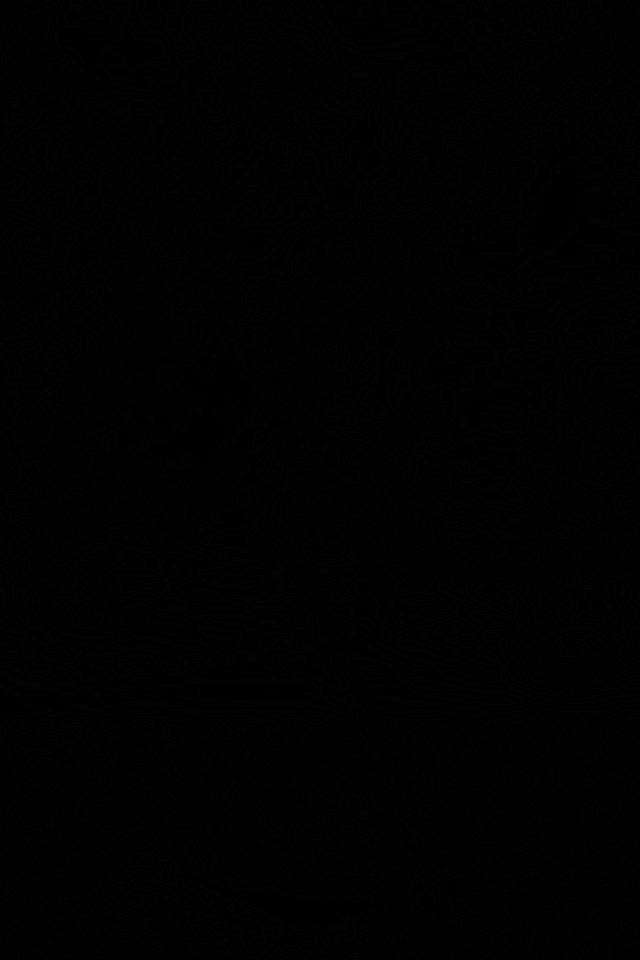

Bit 1 (LSB)


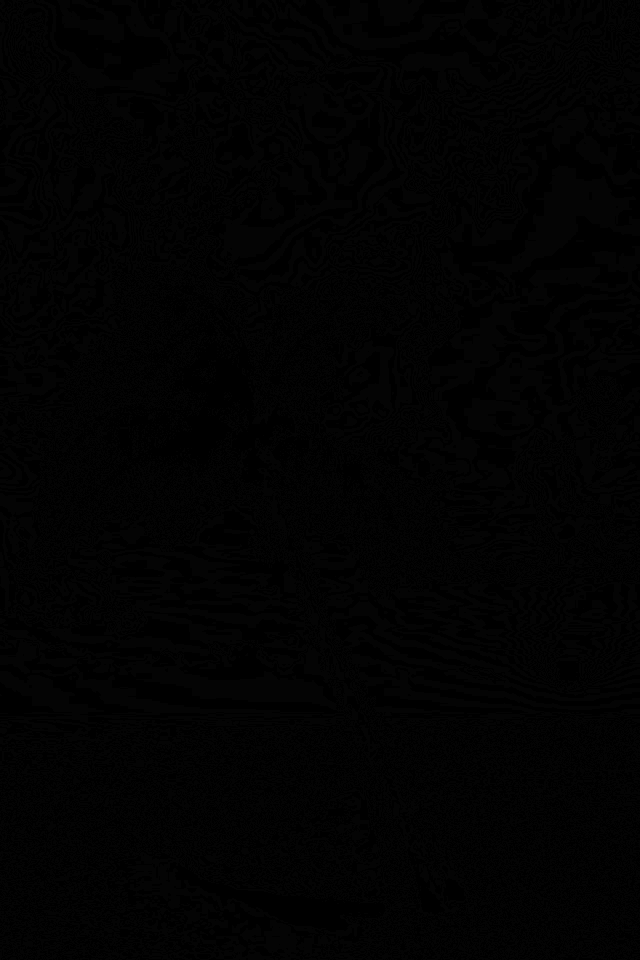

Bit 2 (LSB)


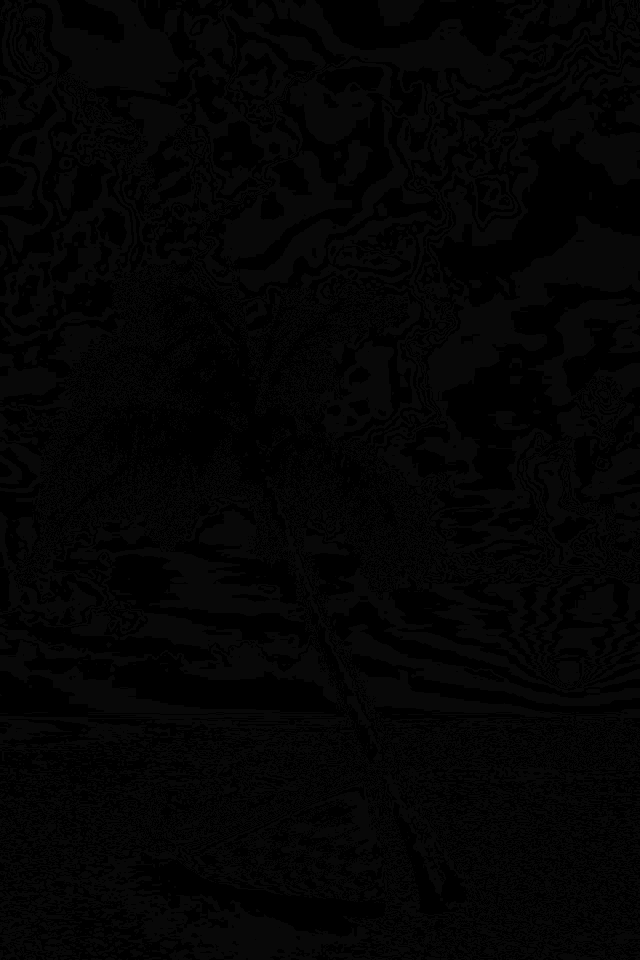

Bit 3 (LSB)


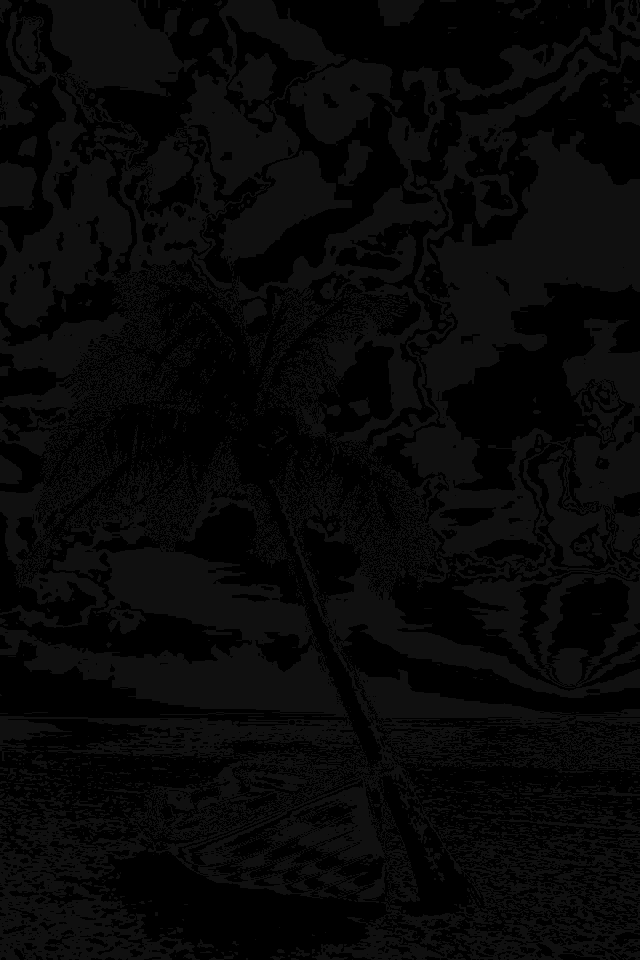

Bit 4 (LSB)


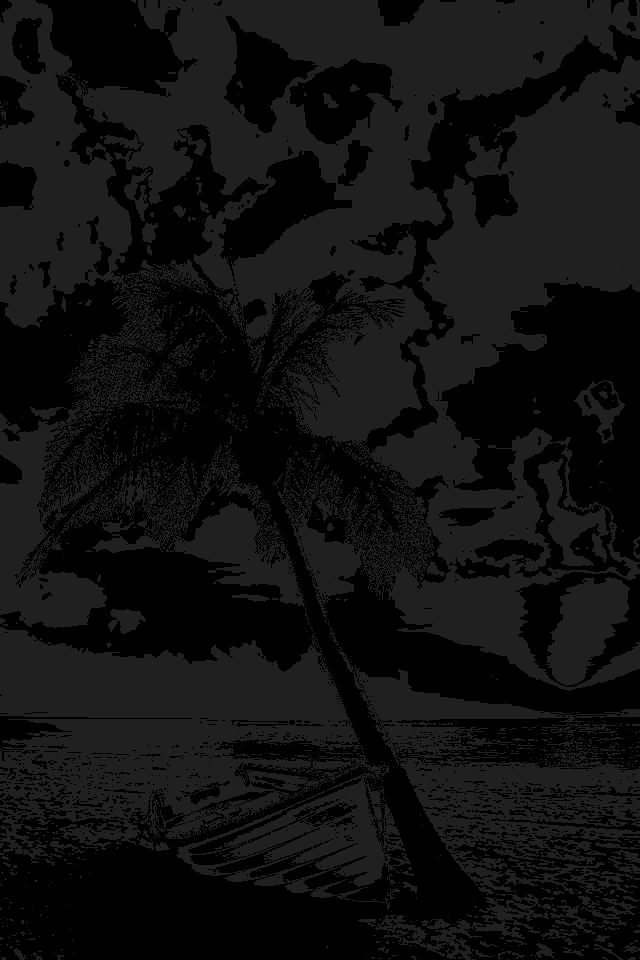

Bit 5 (LSB)


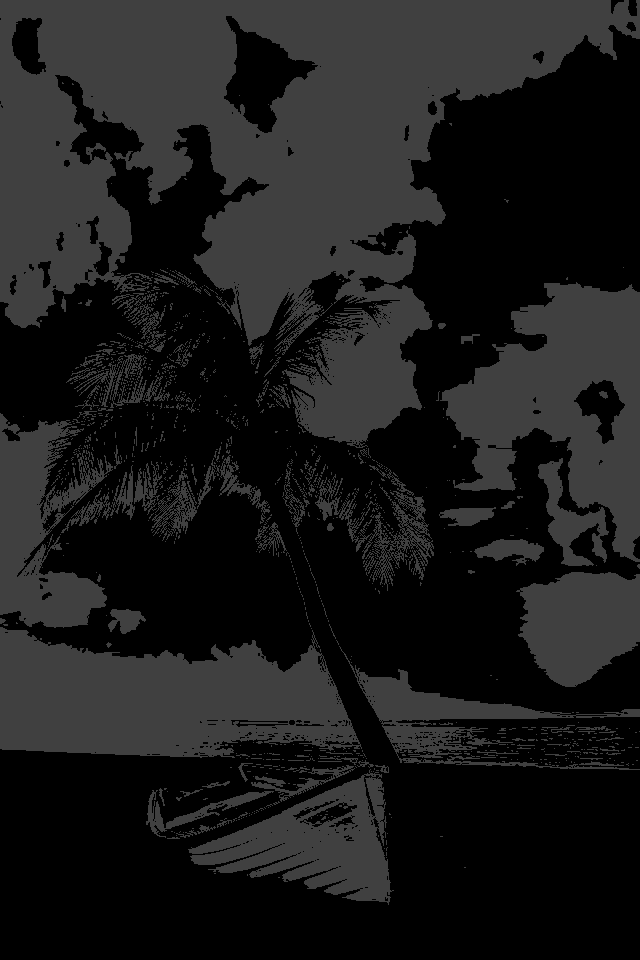

Bit 6 (LSB)


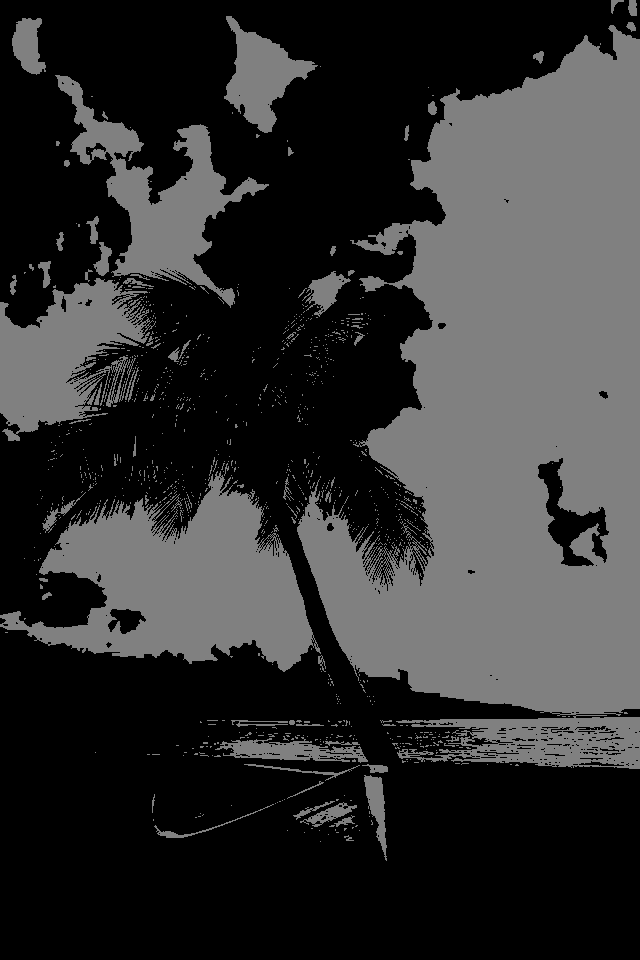

Bit 7 (MSB)


In [46]:
for i in range(8):

    img_2_bits = imgGrey2 & (1 << i)     # Extraindo o bit i da imagem original
    bit_type = "MSB" if i == 7 else "LSB"    # Identificando se é MSB ou LSB
    cv2_imshow(img_2_bits)
    print(f'Bit {i} ({bit_type})')

#### Imagem 3

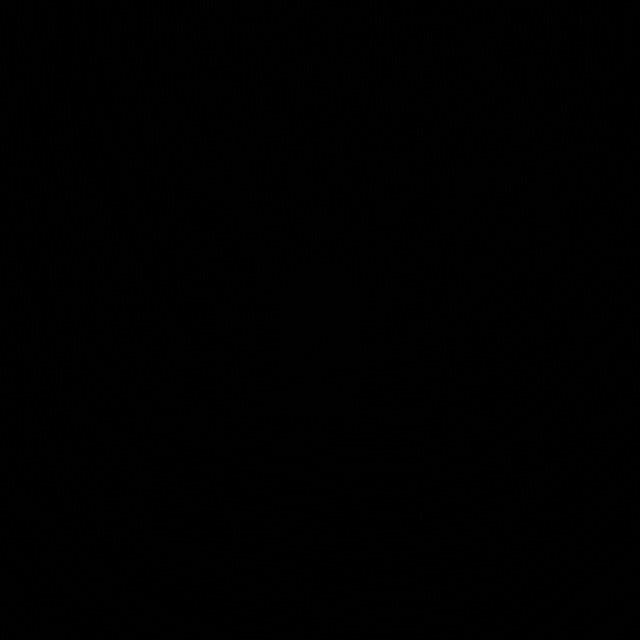

Bit 0 (LSB)


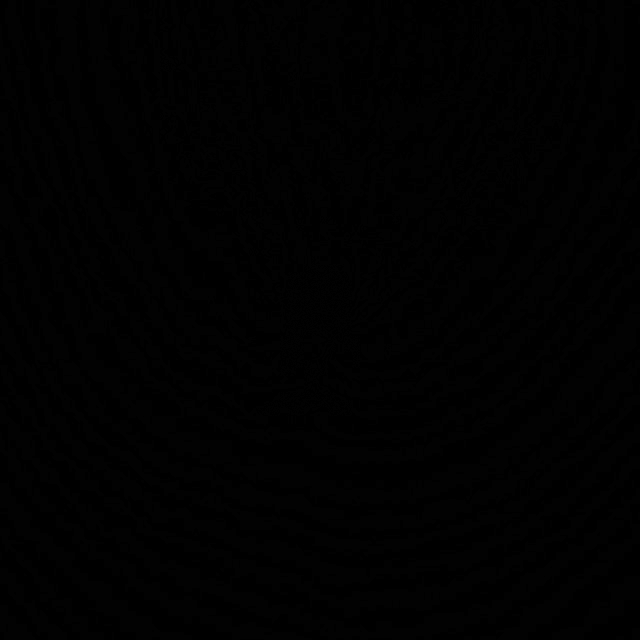

Bit 1 (LSB)


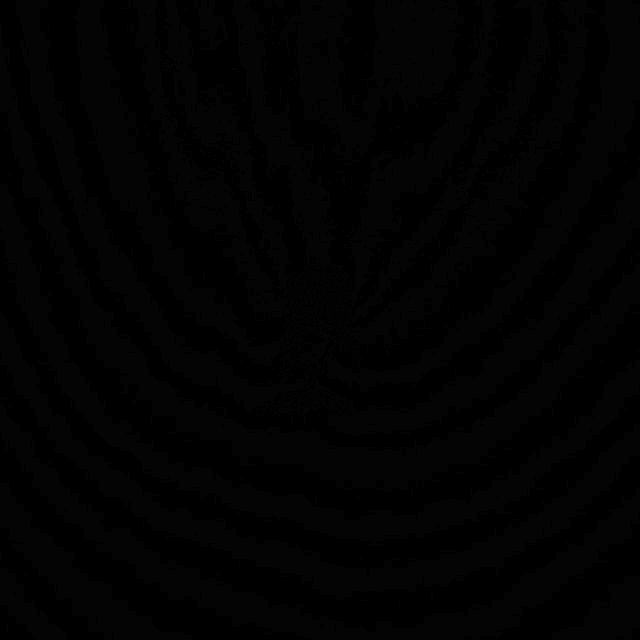

Bit 2 (LSB)


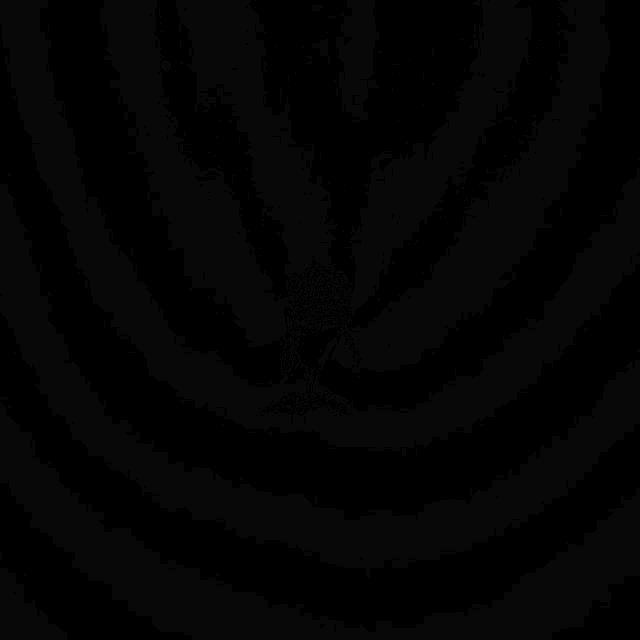

Bit 3 (LSB)


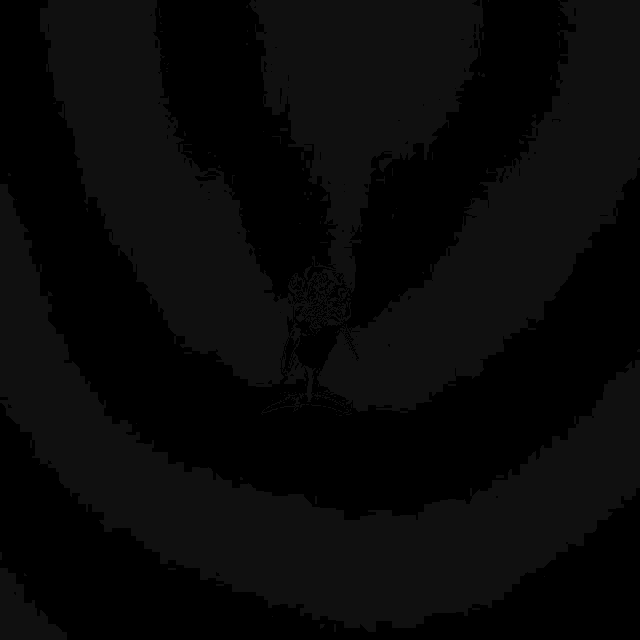

Bit 4 (LSB)


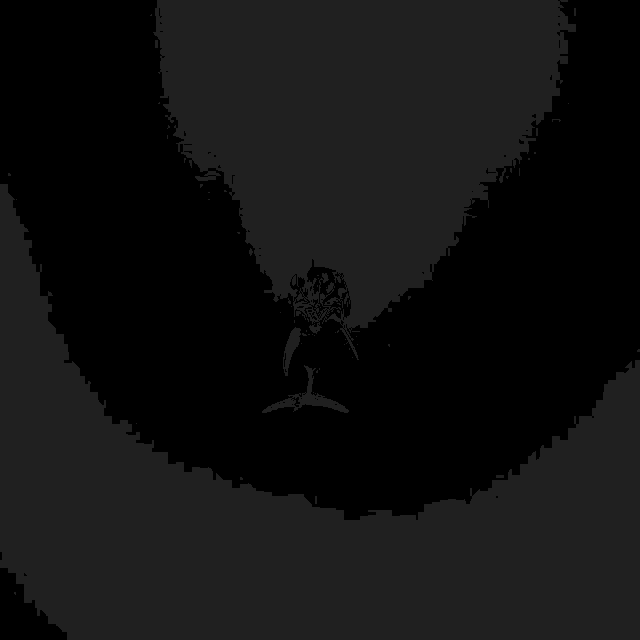

Bit 5 (LSB)


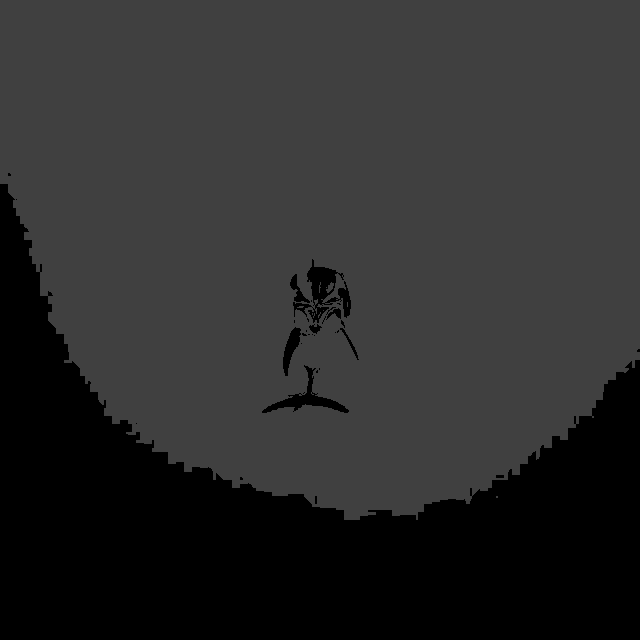

Bit 6 (LSB)


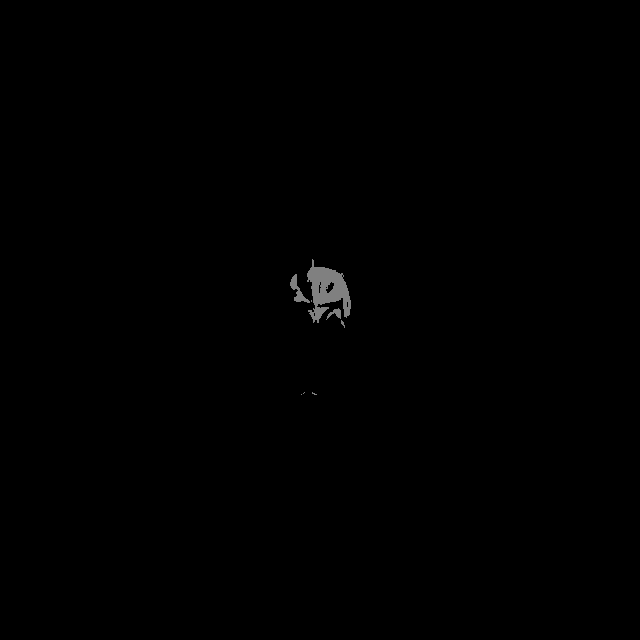

Bit 7 (MSB)


In [47]:
for i in range(8):

    img_3_bits = imgGrey3 & (1 << i)     # Extraindo o bit i da imagem original
    bit_type = "MSB" if i == 7 else "LSB"    # Identificando se é MSB ou LSB
    cv2_imshow(img_3_bits)
    print(f'Bit {i} ({bit_type})')

#### Imagem 4

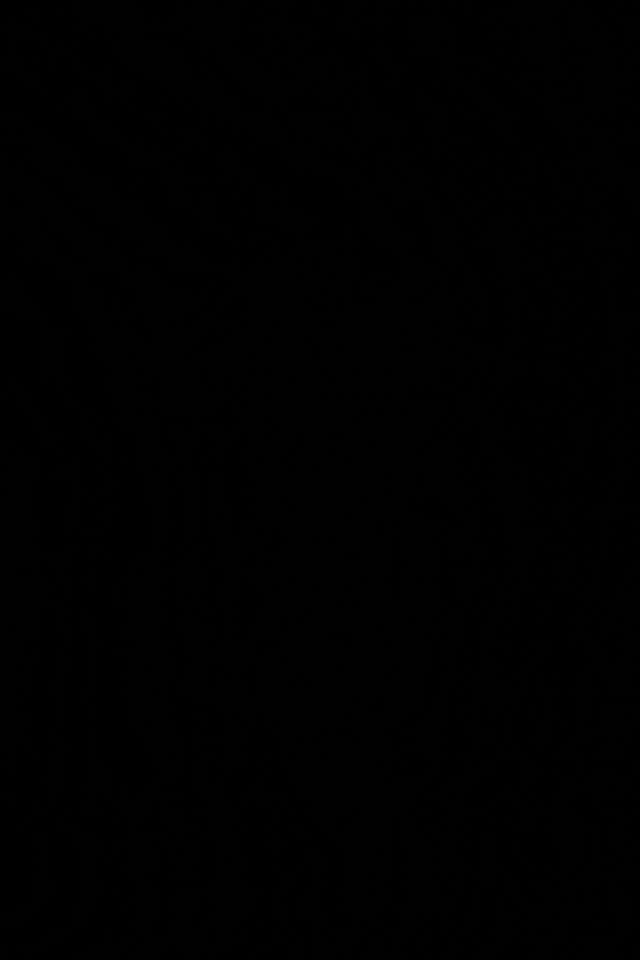

Bit 0 (LSB)


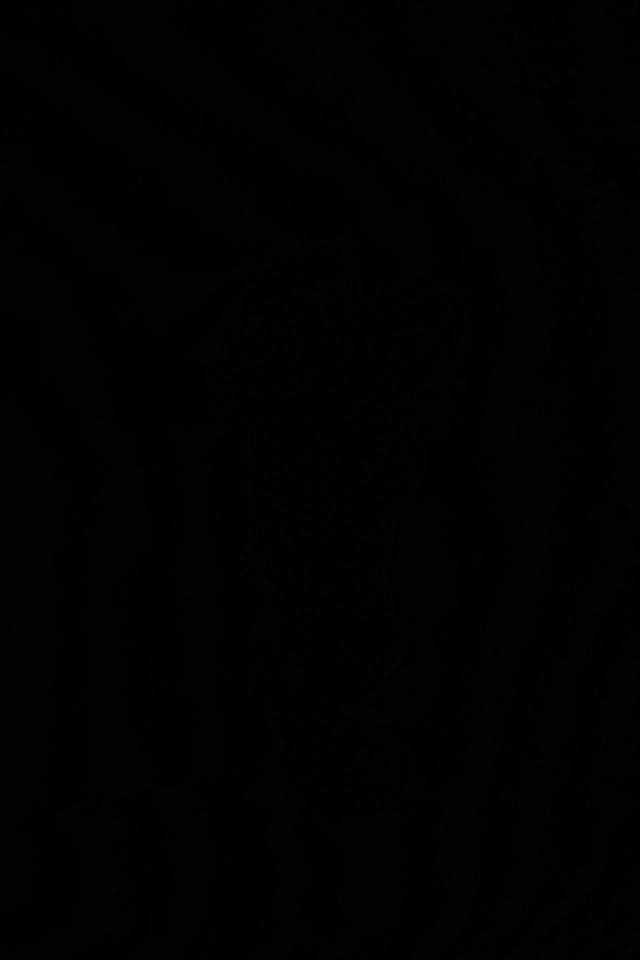

Bit 1 (LSB)


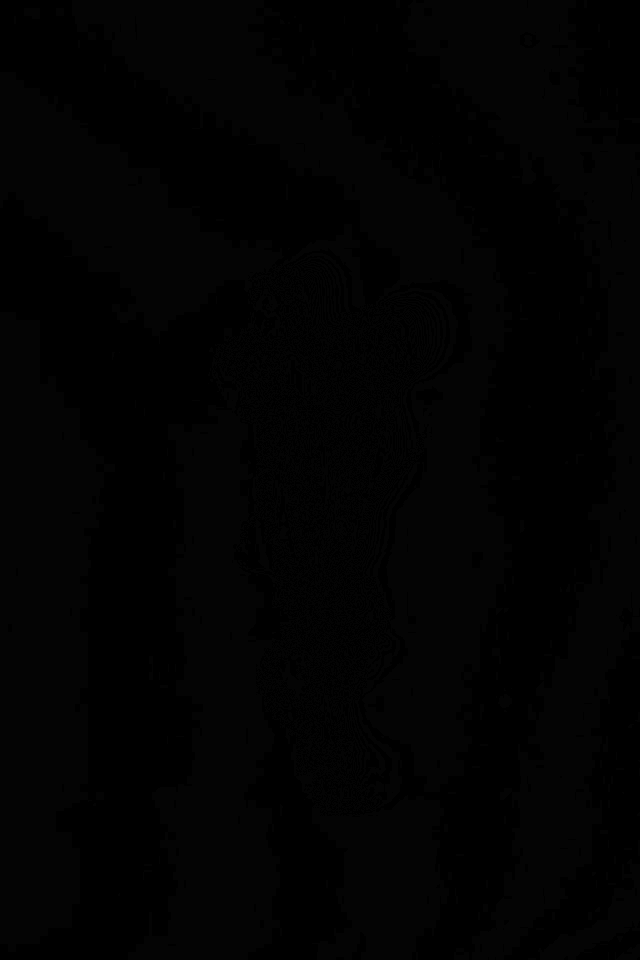

Bit 2 (LSB)


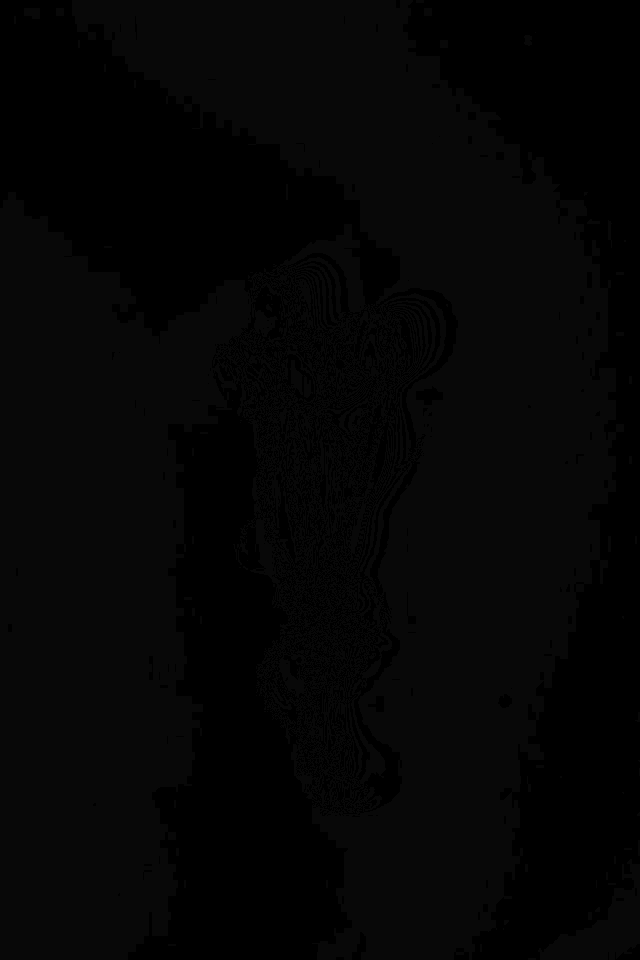

Bit 3 (LSB)


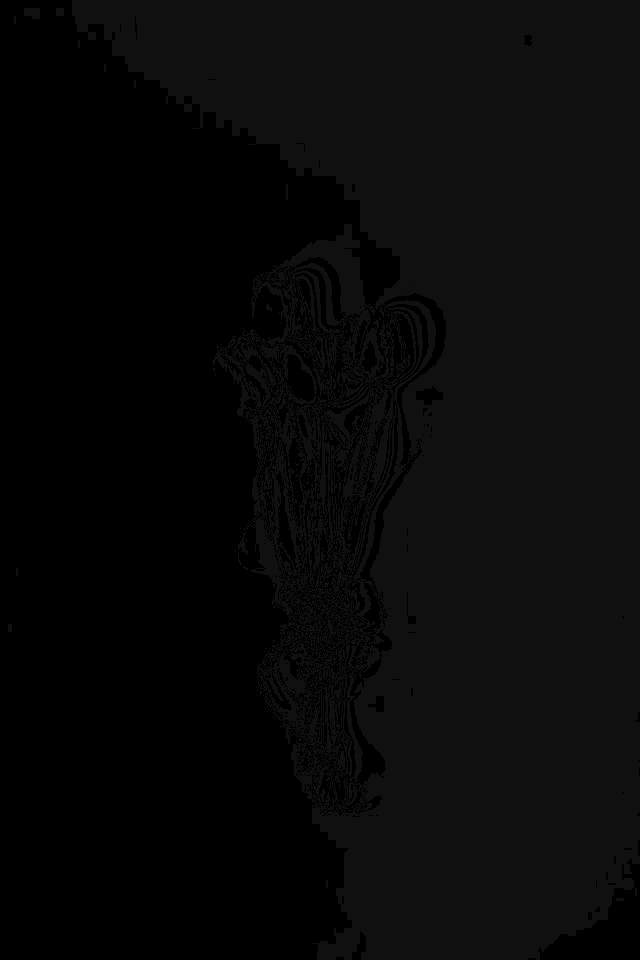

Bit 4 (LSB)


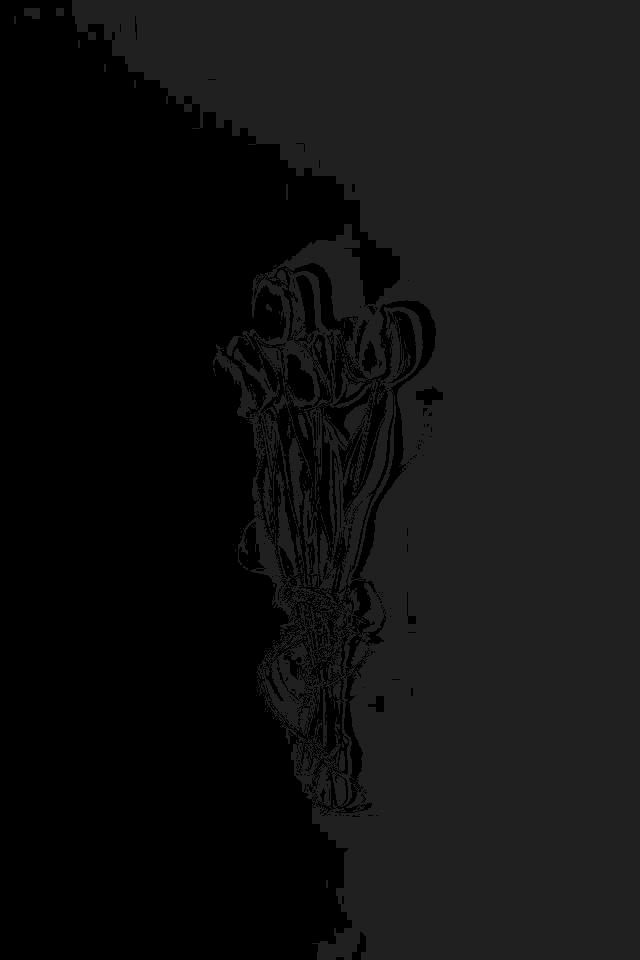

Bit 5 (LSB)


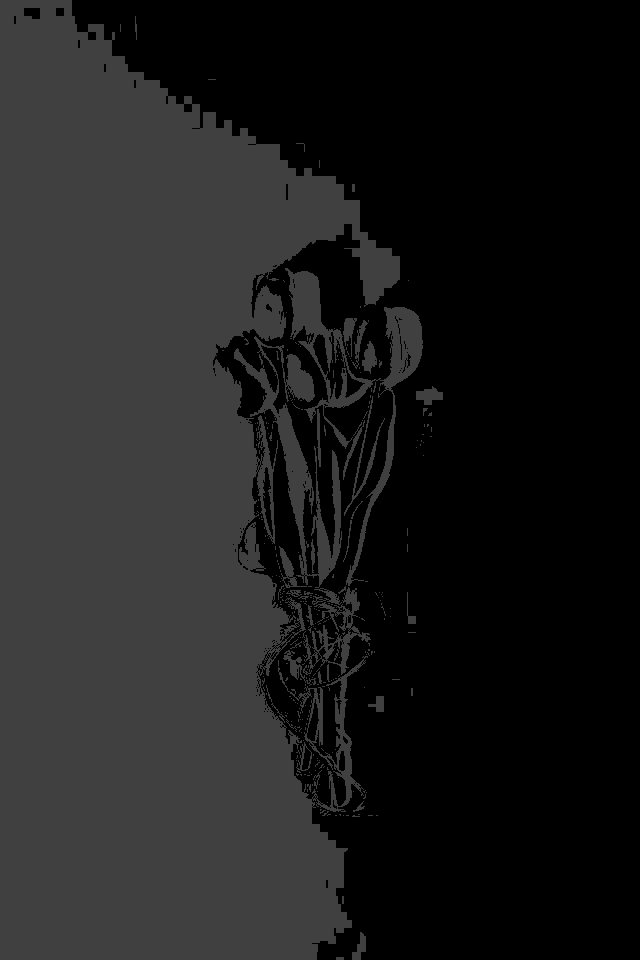

Bit 6 (LSB)


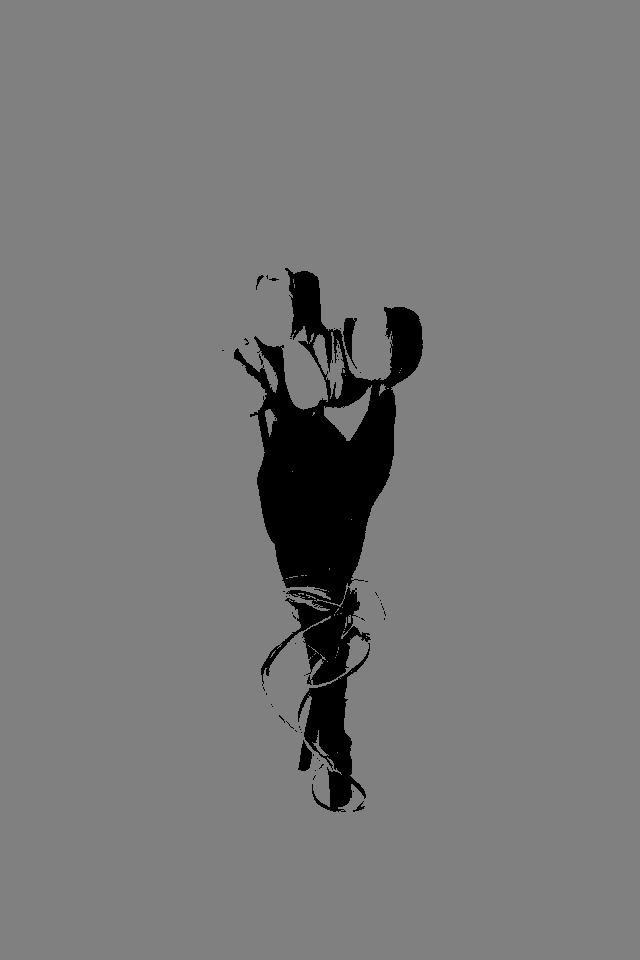

Bit 7 (MSB)


In [48]:
for i in range(8):

    img_4_bits = imgGrey4 & (1 << i)     # Extraindo o bit i da imagem original
    bit_type = "MSB" if i == 7 else "LSB"    # Identificando se é MSB ou LSB
    cv2_imshow(img_4_bits)
    print(f'Bit {i} ({bit_type})')